## SVM: Theoretical Foundations

Support vector machines (SVMs) are supervised machine learning models which are effectively used for solving regression and classification problems including bioinformatics, handwritten character recognition, and facial recognition, among others. (Alty et al.: 2012, 214)
The goal in supervised learning is to learn a mathematical mapping that can estimate the corresponding element of the output space for any given element from the input space. In other words, the machine learning model learns a mapping between feature vectors from the input space and output variables (targets). The estimate of the outcome is generally referred to as prediction. In a classification task, the output space contains categorical random variables, predicted by a mathematical function, also known as classifier.  To learn the mapping, the classifier ideally gains the ability to classify instances from the input space with a satisfactory accuracy. (Zollanvari, 2023: 2f.; 111f.)
For instance, we are given a training set $ (x_{1},y_{1}), \dots, (x_{n}, y_{n}) \in X \times Y $ , and attempt to predict the outputs $y$, also known as labels, for previously unseen inputs $x$. This is only possible if we have some measure that tells us how $(x, y)$ is related to the training set. (Schölkopf et al.: 2002, 23) The simplest situation is binary classification or binary pattern recognition, where two classes of patterns are distuingished by their specific features. For mathematical convenience, they are usually labelled by $+1$ and $-1$. (Schölkopf et al.: 2002, 2)

### Basic Components

#### The Separating Hyperplane

A _separating hyperplane_ is given as 
$$w · x + b = 0,$$
with $w · x$ as the scalar product of a data point x which lies on the hyperplane and the normal vector w, and with $b$ as the bias, or in other words the offset of the hyperplane from the origin in the input space. The normal vector $w$ lies perpendicular to the hyperplane and determines its orientation. (Vgl. Campbell et al.: 2011, 1)
A linear SVM separates two classes using a $D-1$ hyperplane, where $D$ is the dimension of the dataset. Therefore, in the 2-dimensional space, a separating hyperplane can be shown as a line  which separates two classes of data points, on one side of the hyperplane with $w · x + b \ge 0$ and $w · x + b < 0$ on the other side. (Vgl. Campbell et al.: 2011, 2)
Finding a _hyperplane_ such that datapoints on one side will be labelled $y_{i} = +1$ and those on the other side as $y_{i} = −1$, is the learning task for two classes of well separated data. 
If the class affiliation is expressed in the training examples by $ y_{i} = ±1$
,then this results in the following decision function: 
$$f(x) = sign(w · x + b)$$
(Vgl. Campbell et al.: 2011, 2)

#### The Margin

The _margin_ describes the distance between the separating hyperplane and its closest data points. These closest points are referred to as _support vectors_ and the hyperplane which runs through them on both sides are known as _canonical hyperplanes_. From a geometrical perspective, the margin is the perpendicular distance between the separating hyperplane and a canonical hyperplane. This way, the distance between the separating hyperplane and both sets of data points is maximized which is why this concept of maximization is also known as the _maximum margin hyperplane_. (Pajankar, 2022: 155)


##### Hard Margin

The canonical hyperplanes in the hard margin model are given by:
$$w · x_{p} + b = +1$$ 
and 
$$w · x_{m} + b = -1$$
Therefore, one can deduce that 
$$w · (x_{p}-x_{m}) = 2$$
and
$$\frac{w}{||w||} · (x_{p}-x_{m}) = \frac{2}{||w||}$$
(Campbell et al.: 2011, 2)
In simple words: The distance between two support vectors is given by $(x_{p} - x_{m})$ where $x_{p}$ belongs to the hyperplane equal to $+1$ and $x_{m}$ belongs to the hyperplane equal to $-1$. The width between the two canonical hyperplanes is calculated by multiplying the vector $(x_{p} - x_{n})$ with a vector that is perpendicular to the separating hyperplane, which is $w$. In linear SVMs, the normal vector $w$ is often normalized using the L2-Norm (euclidic norm) to $\frac{w}{||w||_{2}}$, where $||w||_{2} = \sqrt{v_{1}^{2},...,v_{n}^{2}}$ means that $w$ is normalized to $1$ in order to simplify its mathematical interpretation. The result is $\frac{2}{||w||}$, which is the geometrical distance between the two canonical hyperplanes. 
(Campbell et al.: 2011, 3)
Canonical hyperplanes mark the boundaries for data points of their respective class, labelled $+1$ or $-1$. This means that data points with a geometrical distance of more than $1$ from the separating hyperplane are labelled as $y=+1$ and $y= -1$, respectively. In order to prevent data points from falling into the margin, the following constraints are needed:
$$w · x_{i} + b \geq +1, if y_{i} = 1,$$ 
and 
$$w · x_{i} + b \leq -1, if y_{i} = -1$$
which can be summarized as
$$y_{i}(w · x_{i}+ b) \geq +1 \quad \forall i = 1,...,N$$
(Pajankar, 2022: 157)

The multiplication with the respective class ensures that, in case of a correct classification, $y_{i}(w · x + b)$ is always positive, since the decision function must always fulfill the condition $f(x_{i}) = y_{i}$ for any data point from the training set. For example, if $y_{i}$ would be negative and the braket-term would be positive, the data point would be classified as -1, although it falls into the space of the positive class, which would be a case of wrong classification.
 
Fig.2: SVM Hyperplanes and Distances (URL: https://svm.michalhaltuf.cz/wp-content/uploads/2017/10/margin.png)

The goal is to find a maximum margin for a decision boundary that classifies the training data correctly, or in other words: the margin must be maximized which is done by minimizing the length of the vector $w$: 
$$min ||w||$$
which is the same as
$$min \frac{1}{2}||w||^{2}$$
(Campbell et al.: 2011, 3)

##### Soft Margin

"In general (...) soft margin SVMs should be preferred, even if the training data are separable: the decision boundary is more robust because more training points are taken into account" (Chapelle et al., 2000).
Soft-Margin SVMs are motivated by data which is not linearly separable in the input space. The hard margin model is not fitting for such data sets and a new approach which relaxes the constraints by tolerating small amounts of misclassifications must be applied. This means that some data points might fall into the margin or the wrong side of the separating hyperplane. Such misclassifications are treated as errors in the new approach and are assigned a relatively low influence which is determined by the so-called _slack variable_ $\xi$. (Lam et al.: 217)
The function considers maximizing the margin and minimizing misclassifications using the regularization parameter C:
$$min \frac{1}{2}||w||^{2} + C \sum_{i=1}^N \xi_{i}$$
with the following constraints:
$$
\begin{align*}
&y_{n}(\langle w,x_{n}\rangle + b) \geq 1 - \xi_{n}\\
&\xi_{n} \geq 0 \forall n = 1, ..., N
\end{align*}
$$
(Lam et al.: 217)

The regularization parameter $C$ controls the trade-off between minimizing misclassifications and maximizing the margin. The smaller the $C$, the more emphasis is placed on maximizing the margin and for a larger $C$, more emphasis is placed on classifying the data points correctly and less on maximizing the margin. (Awad et al., 2015: 47) Furthermore, with $0 < \xi_{i} < 1$, the data point falls into the margin, but on the correct side of the separating hyperplane and with $\xi_{i} \geq 1$ the data point lies on the wrong side of the separating hyperplane.

### SVM Formulation

#### Linear SVM

For linear SVMs the kernel function is linear, which can be expressed with the following equation:
$$ o = w * x + b$$
where $o$ is the output of the SVM and 
$$w = \sum_i^n \alpha_i y_i x_i$$
(Vgl. Platt, 1998: 2)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import pandas as pd
import random
import torch
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


class SVM:
    def __init__(self, learning_rate = 0.001, C=0.01):
        
        self.lr = learning_rate
        self.C = C #regularization
        self.n = 0 # num datapoints
        self.features = 0 # dimension
        
        self.support_vec = None
        self.w = None
        self.b = None
        self.X = None
        self.y = None
       
        
    def calc_margin(self, X, y):
        
        margin = y * self.calc_decision(X) # y * ((x,w) + b)
        return margin
    
    def calc_decision(self, X):
        
        decision = X.dot(self.w) + self.b #(x,w) + b
        return decision
    
    def calc_hingeloss(self, margin):
        
        hingeloss = np.maximum(0, 1 - margin)
        return hingeloss
    
 
    def calc_cost(self, margin, hingeloss):
        
        cost = (1 / 2) * self.w.dot(self.w) + self.C * np.sum(hingeloss)
        return cost
        # 1/2 * (w,w) + C * sum(max(0,1 - (y * ((x,w) + b)) ))

 
    def fit(self, X, y, epochs=1000): 
        
        # current data set:
        self.X = X
        self.y = y
    
        self.n, self.features = X.shape
        self.w = np.random.randn(self.features) # numpy array mit random werten 
        self.b = 0       
 
        losses_arr = []
    
        #calculate margin with X,y and the decision function 
        #then calc cost based on margin and save cost as loss
        #do this for all data points in all epochs
        for epoch in range(epochs):
             
            margin = self.calc_margin(X, y)
            hingeloss = self.calc_hingeloss(margin)
            loss = self.calc_cost(margin, hingeloss)
            
            losses_arr.append(loss)
            
            self.n, self.features = X.shape
            
            
            #add id's of misclassified points to numpy array:
            Xi_misclassified = np.where(margin < 1)[0] 


            grad_w = self.w - self.C * y[Xi_misclassified].dot(X[Xi_misclassified])
            #grad_w = w - (C * sum(y_i, X_i))
            self.w = self.w - self.lr * grad_w # w updaten
            

            grad_b = - self.C * np.sum(y[Xi_misclassified])
            #grad_b = -C * sum(y_i)
            self.b = self.b - self.lr * grad_b # b updaten 
              

        self.support_vec = np.where(self.calc_margin(X, y) <= 1)[0]
    
 
    def predict(self, X, y):
        pred = np.sign(self.calc_decision(X)) #returns 1 for pos. value, -1 for neg. value and 0 for 0
        
        return np.mean(y == pred) #returns if actual label and prediction are the same (true/false)
    
    def visualize_dataset(self):

        plt.figure(figsize=(12, 7)) # widht, height 

        plt.scatter(X[:, 0][y==-1], X[:, 1][y==-1], c='r', label='Class -1', alpha=.5, s=100) # alpha = transparency of points
        data_scatter = plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='g', label='Class 1', alpha=.5,s=100 )

        plt.xlabel("feature 1")
        plt.ylabel("feature 2")

        plt.legend(frameon=False, loc='upper right', bbox_to_anchor=(1.2, .3, 0, 0))

        plt.gca().spines[['right', 'top']].set_visible(False) #hides right and top borders of the plot

        plt.show()
 
    def plot_hyperplanes(self):
        
        plt.figure(figsize=(12, 7))
        
        plt.scatter(X[:, 0][y==-1], X[:, 1][y==-1], c='r', label='Class -1', alpha=.5, s=100)
        data_scatter = plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='g', label='Class 1', alpha=.5,s=100 )
        
        plt.xlabel("feature 1")
        plt.ylabel("feature 2")
        
        plt.legend(frameon=False, loc='upper right', bbox_to_anchor=(1.2, .3, 0, 0))
        
        plt.gca().spines[['right', 'top']].set_visible(False) 
        
        ax = plt.gca()
        xlim = ax.get_xlim() # right-most limit of the x-axis
        ylim = ax.get_ylim() # y refers to feature2, not the labels!
 
        # mash grid to evaluate model: attention! y refers to feature 2 here, not the labels!
        xx = np.linspace(xlim[0], xlim[1], 30) #2D array with (min x-axis limit, max x-axis limit, num of evenly spaced values in this range)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx) #yy and xx are 2D arrays that represent a grid 
        xy = np.vstack([XX.ravel(), YY.ravel()]).T # ravel() flattens XX and YY into 1D arrays, 
        #vstacks stacks XX and YY in a 2D Array with XX in the first row and YY in the second row, then transposes YY
        Z = self.calc_decision(xy).reshape(XX.shape) #calc decision function for each point in xy
 
        # plot all three hyperplanes
        ax.contour(XX, YY, Z, colors=['orange', 'b', 'orange'], levels=[-1, 0, 1], alpha=0.8,
                   linestyles=['--', '-', '--'], linewidths=[2.0, 2.0, 2.0])
 
        # highlight the support vectors
        ax.scatter(self.X[:, 0][self.support_vec], self.X[:, 1][self.support_vec], s=100,
                   linewidth=1.5, facecolors='none', edgecolors='k')          
      
        plt.show()

  

accuracy: 1.0


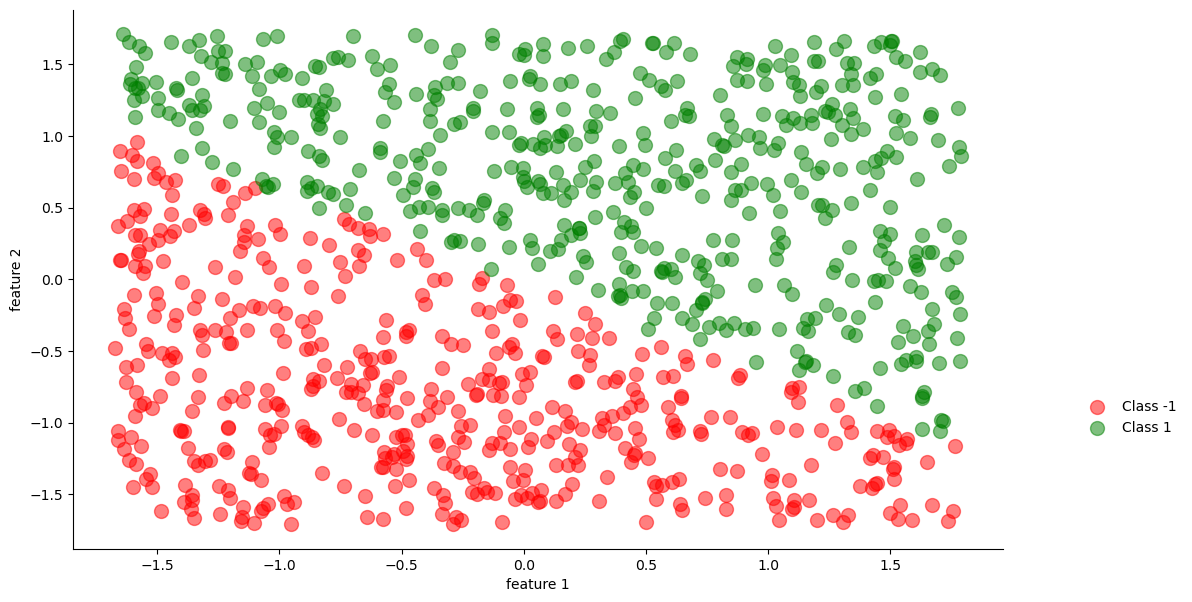

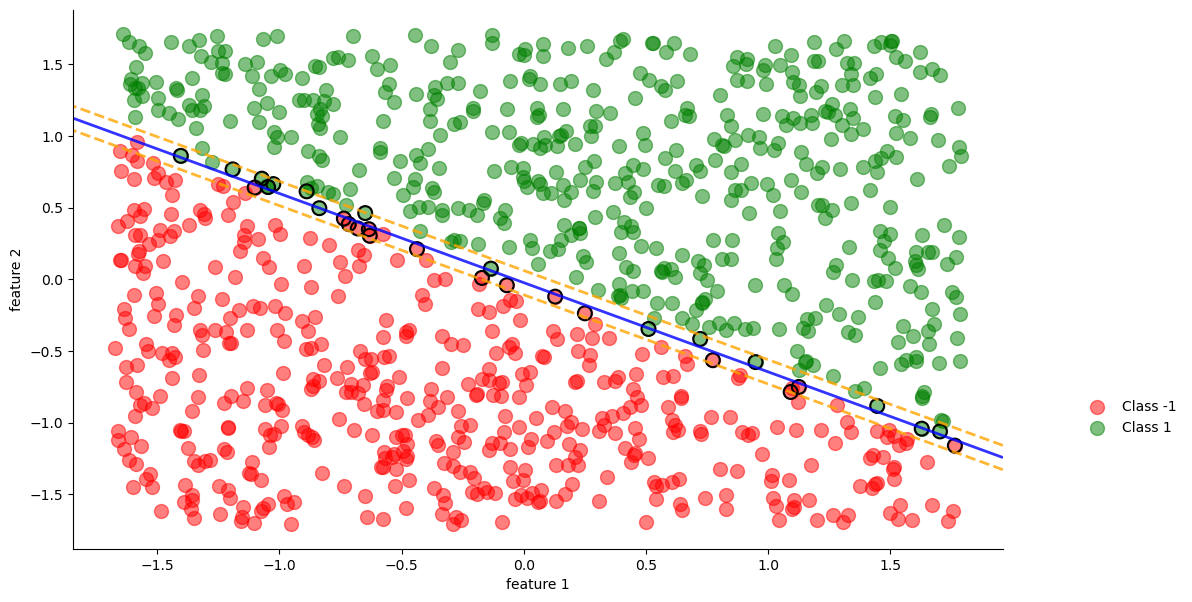

In [2]:
data = torch.load('exercise1.pt')

data = data.T
X = data[0: , :-1] #all rows & all columns except for the last one
y = data[0: , -1]

y[y == 0] = -1 

X = np.array(X)
y = np.array(y)


# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVM(C=15)


svm.fit(X_train, y_train)
y_test_pred = np.sign(svm.calc_decision(X_test))
print("accuracy:", svm.predict(X_test, y_test)) 

svm.visualize_dataset()
svm.plot_hyperplanes()